### ALGO_001_NeuralNet (use cases)

### About

This notebook contains some tests and use cases for a neural network class implemented in the ALGO_001_NeuralNet.py file contained in this repository.

Here is a simple description of the capabilities implemented by the class:
* Simple neural network implementation
* n_h hidden layers with sigmoid activation + output layer with single simoid unit for binary classification

### Analysis

Import NeuralNet module and required libraries.

In [284]:
import ALGO_001_NeuralNet as NN

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

##### Circles dataset

In [285]:
from sklearn.datasets import make_circles

m = 1000
m_test = 1000

X, Y = make_circles(m, factor=.8, noise=.1)
X_test, Y_test = make_circles(m_test, factor=.8, noise=.1)

X = X.T
Y = Y.T
X_test = X_test.T
Y_test = Y_test.T

print("Number of samples:\nTrain set: {}, Test set: {}\n".format(m,m_test))
print("Dimensions of the train and test sets:")
print("X (train) dimensions: " + str(X.shape) + ", Y (train) dimensions: " + str(Y.shape))
print("X (test) dimensions: " + str(X_test.shape) + ", Y (test) dimensions: " + str(Y_test.shape) + "\n")
print("Proportion of positive outcomes:\nTrain set: {}, Test set: {}".format(np.mean(Y),np.mean(Y_test)))

Number of samples:
Train set: 1000, Test set: 1000

Dimensions of the train and test sets:
X (train) dimensions: (2, 1000), Y (train) dimensions: (1000,)
X (test) dimensions: (2, 1000), Y (test) dimensions: (1000,)

Proportion of positive outcomes:
Train set: 0.5, Test set: 0.5


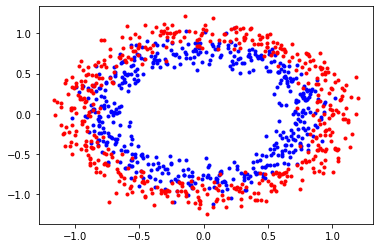

In [348]:
# masks with positive (=1) and negative (=0) observations
pos = (Y==1).squeeze()
neg = (Y==0).squeeze()

plt.plot(X[0,pos], X[1,pos], 'bo', markersize = 3)
plt.plot(X[0,neg], X[1,neg], 'ro', markersize = 3)

##### Create NN models

Create NN with 1 hidden layer (2 total)

In [287]:
NN_2L = NN.NeuralNet(L=2, n_x=X.shape[0], n_h=5)

Define hyperparameters

In [288]:
learning_rate = .1
num_iterations = 100000

Train model

In [289]:
# define list to keep track of the cost function
cost = []

# train model
cost = NN_2L.train(X, Y, alpha = learning_rate, iterations = num_iterations)

Make predictions with trained model

In [290]:
Y_hat_train = (NN_2L.predict(X) > .5).astype(int)
Y_hat_test = (NN_2L.predict(X_test) > .5).astype(int)

Evaluate model accuracy

In [291]:
accuracy_train = np.mean(Y_hat_train == Y)
accuracy_test = np.mean(Y_hat_test == Y_test)

print("Accuracy acchieved by trained model:\nTrain set: {}, Test set: {}".format(accuracy_train,accuracy_test))

Accuracy acchieved by trained model:
Train set: 0.861, Test set: 0.84


Plot value of cost during gradient descent:

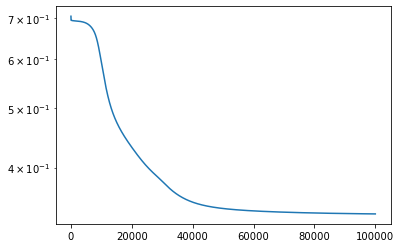

In [292]:
plt.plot(cost)
plt.yscale('log')

Plot decision regions

In [341]:
dots = 500
x, y = np.meshgrid(np.linspace(-1.5,1.5,dots), np.linspace(-1.5,1.5,dots))

grid = np.array([x.flatten(),y.flatten()])
z = np.zeros((1,len(x) * len(y)))

for i in range(len(x)):
    for j in range(len(y)):
        pass
    
z = NN_2L.predict(grid)
z = z.reshape(dots,dots)
z = (z > .5).astype(int)

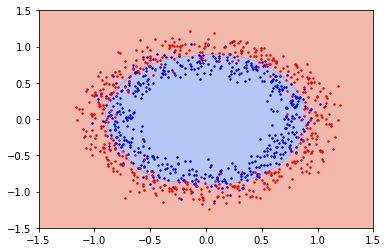

In [346]:
plt.contourf(x,y,z, cmap = "coolwarm_r", alpha = .5, levels = 2)
plt.plot(X[0,pos], X[1,pos], 'bo', markersize = 1.5)
plt.plot(X[0,neg], X[1,neg], 'ro', markersize = 1.5)